# Delhivery Data Analysis

## Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [3]:
df.shape

(144867, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [5]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'], format='mixed')

In [6]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [7]:
df[df['segment_factor'].isna()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


We found `source_name` and `destination_name` have null values. As `source_name` and `destination_name` can be identified by `source_center` and `destination_center`, we can remove them.

In [8]:
# # We need to check whether there exist one to one mapping between source_center adn source_name
# def exists_one_one_mapping(x,y):
#     checker = {}
#     for center, name in df[[x,y]].values:
#         if not pd.isna(name):
#             if center in checker and checker[center]!=name:
#                 return False, {}
#             checker[center] = name
#     return True, checker
# source_map = exists_one_one_mapping('source_center','source_name')
# destination_map = exists_one_one_mapping('destination_center','destination_name')
# print(source_map[0])
# print(destination_map[0])
# df['source_name'] = df['source_center'].map(source_map[1])
# df['destination_name'] = df['destination_center'].map(destination_map[1])
# # Check every common keys having common values
# # For every same key, both must have same value.
# common_keys = source_map[1].keys() & destination_map[1].keys()
# common_elements = {k for k, v in source_map[1].items() if k in destination_map[1] and destination_map[1][k] == v}
# print(common_elements==common_keys)
# combined_map = source_map[1] | destination_map[1]
# df['source_name'] = df['source_center'].map(combined_map)
# df['destination_name'] = df['destination_center'].map(combined_map)

In [9]:
df[df['trip_uuid']=='trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58.000000,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29.000000,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58.000000,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56.000000,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43,2018-09-20 04:49:20.000000,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [10]:
df[df['trip_uuid']=='trip-153741093647649320'].nunique()

data                               1
trip_creation_time                 1
route_schedule_uuid                1
route_type                         1
trip_uuid                          1
source_center                      2
source_name                        2
destination_center                 2
destination_name                   2
od_start_time                      2
od_end_time                        2
start_scan_to_end_scan             2
is_cutoff                          2
cutoff_factor                      6
cutoff_timestamp                  10
actual_distance_to_destination    10
actual_time                       10
osrm_time                          9
osrm_distance                     10
factor                            10
segment_actual_time                8
segment_osrm_time                  7
segment_osrm_distance             10
segment_factor                    10
dtype: int64

In [11]:
all(df.groupby('trip_uuid')['route_type'].nunique()==1)

True

In [12]:
all(df.groupby('trip_uuid')['route_schedule_uuid'].nunique()==1)

True

In [13]:
all(df.groupby('trip_uuid')['trip_creation_time'].nunique()==1)

True

## Feature Extraction

We found that for a partiular `trip_uuid`, `route_schedule_uuid`, `route_type` and `trip_creation_time` have only one value.

Here we are creating new features, like `destination_city`,	`destination_place`,	`destination_code`,	`destination_state`,	`destination_center_number`,	`destination_center_code`,	`source_city`,	`source_place`,	`source_code`,	`source_state`,	`source_center_number`,	`source_center_code`,	`trip_year`,	`trip_month`,	`trip_day`,	`trip_week`, `trip_dayofweek`,`od_trip_time`

In [14]:
import holidays
in_holidays = holidays.IN()

In [15]:
# Adding new features
# Adding city, place, code for destination and source
for route in ['source', 'destination', ]:
    # df[[f'{route}_city', f'{route}_place', f'{route}_code', f'{route}_state']] = df[f'{route}_name'].str.split(r'[_\s]+', n = 3, expand=True)
    # Previous would work if pattern of name is of same format.
    
    df[f'{route}_city'] = df[f'{route}_name'].str.split('(').str[0].str.split('_').str[0]
    df[f'{route}_place'] = df[f'{route}_name'].str.split('(').str[0].str.split('_').str[1]
    df[f'{route}_code'] = df[f'{route}_name'].str.split('(').str[0].str.split('_').str[2]
    df[f'{route}_state'] = df[f'{route}_name'].str.split('(').str[1].str[0:-1]
    df[f'{route}_center_number'] = df[f'{route}_center'].str[3:-3].astype(int)
    df[f'{route}_center_code'] = df[f'{route}_center'].str[-3:]
    
# Adding year, month and day for trip creation
df['trip_year'] = df['trip_creation_time'].dt.year
df['trip_month'] = df['trip_creation_time'].dt.month
df['trip_day'] = df['trip_creation_time'].dt.day
df['trip_week'] = df['trip_creation_time'].dt.isocalendar().week
df['trip_dayofweek'] = df['trip_creation_time'].dt.dayofweek
df['trip_isHoliday'] = df['trip_creation_time'].apply(lambda x: x in in_holidays)

df['start_scan_to_end_scan'] = df['start_scan_to_end_scan'].astype(int)
df['od_trip_time'] = ((df['od_end_time'] - df['od_start_time']).dt.total_seconds()/60).round().astype(int)
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,source_state,source_center_number,source_center_code,destination_city,destination_place,destination_code,destination_state,destination_center_number,destination_center_code,trip_year,trip_month,trip_day,trip_week,trip_dayofweek,trip_isHoliday,od_trip_time
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand,VUNagar,DC,Gujarat,388121,AAA,Khambhat,MotvdDPP,D,Gujarat,388620,AAB,2018,9,20,38,3,True,86
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand,VUNagar,DC,Gujarat,388121,AAA,Khambhat,MotvdDPP,D,Gujarat,388620,AAB,2018,9,20,38,3,True,86
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand,VUNagar,DC,Gujarat,388121,AAA,Khambhat,MotvdDPP,D,Gujarat,388620,AAB,2018,9,20,38,3,True,86
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Anand,VUNagar,DC,Gujarat,388121,AAA,Khambhat,MotvdDPP,D,Gujarat,388620,AAB,2018,9,20,38,3,True,86
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Anand,VUNagar,DC,Gujarat,388121,AAA,Khambhat,MotvdDPP,D,Gujarat,388620,AAB,2018,9,20,38,3,True,86


In [16]:
df.shape

(144867, 43)

In [17]:
df [['source_code', 'source_state', 'source_center_number', 'source_center_code']].drop_duplicates()

,source_code,source_state,source_center_number,source_center_code
0,DC,Gujarat,388121,AAA
5,D,Gujarat,388620,AAB
10,HB,Maharashtra,421302,AAG
15,NaN,Maharashtra,400011,AAA
17,H,Karnataka,562132,AAA
...,...,...,...,...
133966,D,Rajasthan,331701,AAA
134709,DPP,Rajasthan,335523,AAB
141475,DC,Gujarat,361335,AAA
142252,L,Karnataka,562132,AAC


In [18]:
x = df [['source_state', 'source_center_number']].drop_duplicates()


In [19]:
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
source_city     

In [20]:
select_states = ['Gujarat', 'Maharashtra', 'Karnataka', 'Punjab', 'Haryana',
       'Uttarakhand', 'Rajasthan', 'Telangana', 'Kerala', 'Bihar', 'Jharkhand', 
       'Assam',  'Orissa', 'Delhi', 'Chandigarh', 'Chhattisgarh', 'Nagaland', 'Meghalaya',
       'Tripura', 'Mizoram',
       ]
df[~df['source_state'].isin(select_states)]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,source_state,source_center_number,source_center_code,destination_city,destination_place,destination_code,destination_state,destination_center_number,destination_center_code,trip_year,trip_month,trip_day,trip_week,trip_dayofweek,trip_isHoliday,od_trip_time
76,test,2018-09-27 14:16:14.819357,thanos::sroute:1283977c-889a-4e96-b632-5ba1a69...,Carting,trip-153805777481903807,IND600056AAB,MAA_Poonamallee_HB (Tamil Nadu),IND600032AAB,Chennai_Hub (Tamil Nadu),2018-09-27 14:16:14.819357,2018-09-27 17:16:11.083553,179,True,9,2018-09-27 15:59:36.000000,9.285856,42.0,10.0,9.9365,4.200000,42.0,10.0,9.9365,4.200000,MAA,Poonamallee,HB,Tamil Nadu,600056,AAB,Chennai,Hub,NaN,Tamil Nadu,600032,AAB,2018,9,27,39,3,False,180
77,test,2018-09-27 14:16:14.819357,thanos::sroute:1283977c-889a-4e96-b632-5ba1a69...,Carting,trip-153805777481903807,IND600056AAB,MAA_Poonamallee_HB (Tamil Nadu),IND600032AAB,Chennai_Hub (Tamil Nadu),2018-09-27 14:16:14.819357,2018-09-27 17:16:11.083553,179,True,18,2018-09-27 15:32:36.000000,18.094962,69.0,18.0,19.8934,3.833333,27.0,7.0,9.9569,3.857143,MAA,Poonamallee,HB,Tamil Nadu,600056,AAB,Chennai,Hub,NaN,Tamil Nadu,600032,AAB,2018,9,27,39,3,False,180
78,test,2018-09-27 14:16:14.819357,thanos::sroute:1283977c-889a-4e96-b632-5ba1a69...,Carting,trip-153805777481903807,IND600056AAB,MAA_Poonamallee_HB (Tamil Nadu),IND600032AAB,Chennai_Hub (Tamil Nadu),2018-09-27 14:16:14.819357,2018-09-27 17:16:11.083553,179,True,27,2018-09-27 15:17:37.000000,27.106207,84.0,26.0,29.6956,3.230769,14.0,8.0,9.8021,1.750000,MAA,Poonamallee,HB,Tamil Nadu,600056,AAB,Chennai,Hub,NaN,Tamil Nadu,600032,AAB,2018,9,27,39,3,False,180
79,test,2018-09-27 14:16:14.819357,thanos::sroute:1283977c-889a-4e96-b632-5ba1a69...,Carting,trip-153805777481903807,IND600056AAB,MAA_Poonamallee_HB (Tamil Nadu),IND600032AAB,Chennai_Hub (Tamil Nadu),2018-09-27 14:16:14.819357,2018-09-27 17:16:11.083553,179,False,31,2018-09-27 15:08:46.000000,31.157974,92.0,32.0,35.6749,2.875000,8.0,5.0,5.9794,1.600000,MAA,Poonamallee,HB,Tamil Nadu,600056,AAB,Chennai,Hub,NaN,Tamil Nadu,600032,AAB,2018,9,27,39,3,False,180
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536,True,22,2018-09-26 14:09:19.000000,22.783440,48.0,34.0,37.7749,1.411765,48.0,34.0,37.7749,1.411765,NaN,NaN,NaN,NaN,342902,A1B,Jaipur,Hub,NaN,Rajasthan,302014,AAA,2018,9,25,39,1,False,536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144846,training,2018-09-26 19:50:29.657378,thanos::sroute:f6d1ba62-76a2-4dba-83ec-3ac0803...,FTL,trip-153799142965708367,IND457226AAA,Jaora_RtlamNka_D (Madhya Pradesh),IND382430AAB,Ahmedabad_East_H_1 (Gujarat),2018-09-27 06:55:50.265761,2018-09-27 17:18:35.292509,622,False,265,2018-09-27 08:18:22.000000,265.367032,484.0,290.0,387.9870,1.668966,0.0,0.0,0.0000,-1.000000,Jaora,RtlamNka,D,Madhya Pradesh,457226,AAA,Ahmedabad,East,H,Gujarat,382430,AAB,2018,9,26,39,2,False,623
144854,training,2018-09-17 11:35:28.838714,thanos::sroute:d8f74492-4484-412a-887a-61c8e6b...,Carting,trip-153718412883843340,IND600056AAB,MAA_Poonamallee_HB (Tamil Nadu),IND600032AAB,Chennai_Hub (Tamil Nadu),2018-09-17 11:35:28.838714,2018-09-17 13:32:21.128357,116,True,9,2018-09-17 12:57:20.000000,9.169115,32.0,10.0,9.9543,3.200000,32.0,10.0,9.9543,3.200000,MAA,Poonamallee,HB,Tamil Nadu,600056,AAB,Chennai,Hub,NaN,Tamil Nadu,600032,AAB

In [21]:
df[df['trip_uuid']=='trip-153741093647649320'].head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,source_state,source_center_number,source_center_code,destination_city,destination_place,destination_code,destination_state,destination_center_number,destination_center_code,trip_year,trip_month,trip_day,trip_week,trip_dayofweek,trip_isHoliday,od_trip_time
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand,VUNagar,DC,Gujarat,388121,AAA,Khambhat,MotvdDPP,D,Gujarat,388620,AAB,2018,9,20,38,3,True,86
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand,VUNagar,DC,Gujarat,388121,AAA,Khambhat,MotvdDPP,D,Gujarat,388620,AAB,2018,9,20,38,3,True,86
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand,VUNagar,DC,Gujarat,388121,AAA,Khambhat,MotvdDPP,D,Gujarat,388620,AAB,2018,9,20,38,3,True,86
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Anand,VUNagar,DC,Gujarat,388121,AAA,Khambhat,MotvdDPP,D,Gujarat,388620,AAB,2018,9,20,38,3,True,86
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Anand,VUNagar,DC,Gujarat,388121,AAA,Khambhat,MotvdDPP,D,Gujarat,388620,AAB,2018,9,20,38,3,True,86


**Observation**
1. $$ factor = \frac{actual\_time}{osrm\_time}$$
1. $$ segment\_factor = \frac{segment\_actual\_time}{segment\_osrm\_time}$$

In [22]:
df.isna().sum()

data                                  0
trip_creation_time                    0
route_schedule_uuid                   0
route_type                            0
trip_uuid                             0
source_center                         0
source_name                         293
destination_center                    0
destination_name                    261
od_start_time                         0
od_end_time                           0
start_scan_to_end_scan                0
is_cutoff                             0
cutoff_factor                         0
cutoff_timestamp                      0
actual_distance_to_destination        0
actual_time                           0
osrm_time                             0
osrm_distance                         0
factor                                0
segment_actual_time                   0
segment_osrm_time                     0
segment_osrm_distance                 0
segment_factor                        0
source_city                         293


In [23]:
# check_cols = [ 'destination_code', 'destination_name']
# df[df['destination_code'].isna()][check_cols].drop_duplicates().head(20)


In [24]:
df['destination_center'].sort_values()

52207     IND000000AAL
117319    IND000000AAL
105331    IND000000AAL
105330    IND000000AAL
85987     IND000000AAL
              ...     
112923    IND854335AAA
112924    IND854335AAA
56914     IND854335AAA
2608      IND854335AAA
56913     IND854335AAA
Name: destination_center, Length: 144867, dtype: object

In [25]:
df[df['source_name'].isna()].sample(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,source_state,source_center_number,source_center_code,destination_city,destination_place,destination_code,destination_state,destination_center_number,destination_center_code,trip_year,trip_month,trip_day,trip_week,trip_dayofweek,trip_isHoliday,od_trip_time
12707,training,2018-09-25 09:18:45.016913,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153786712501643905,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-09-25 16:20:44.535746,2018-09-25 21:48:34.841192,327,True,44,2018-09-25 19:53:16,45.109568,68.0,45.0,47.7471,1.511111,39.0,23.0,24.2325,1.695652,NaN,NaN,NaN,NaN,282002,AAD,Gwalior,HrihrNgr,I,Madhya Pradesh,474003,AAA,2018,9,25,39,1,False,328
118,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536,True,154,2018-09-26 09:43:23,154.305625,314.0,138.0,186.5238,2.275362,47.0,21.0,29.9673,2.238095,NaN,NaN,NaN,NaN,342902,A1B,Jaipur,Hub,NaN,Rajasthan,302014,AAA,2018,9,25,39,1,False,536
40479,test,2018-09-30 08:52:12.386239,thanos::sroute:88f3c4f2-ba7c-4817-8dff-e181ba3...,FTL,trip-153829753238591840,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-10-01 07:31:52.272795,2018-10-01 15:57:12.640082,505,False,207,2018-10-01 08:41:36,207.134112,422.0,183.0,242.9349,2.306011,20.0,7.0,8.2181,2.857143,NaN,NaN,NaN,NaN,342902,A1B,Jaipur,Hub,NaN,Rajasthan,302014,AAA,2018,9,30,39,6,False,505
25014,training,2018-09-24 19:55:43.343760,thanos::sroute:da7a341a-ba3d-436d-b4b5-607d1a0...,FTL,trip-153781894334349262,IND509103AAC,NaN,IND518002AAA,Kurnool_AbbasNgr_I (Andhra Pradesh),2018-09-25 03:57:33.697991,2018-09-25 07:11:24.207222,193,True,22,2018-09-25 05:07:27,23.871983,123.0,19.0,27.2136,6.473684,123.0,19.0,27.2136,6.473684,NaN,NaN,NaN,NaN,509103,AAC,Kurnool,AbbasNgr,I,Andhra Pradesh,518002,AAA,2018,9,24,39,0,False,194
138241,test,2018-09-28 09:39:45.964332,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153812758596408063,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-09-28 15:46:15.559430,2018-09-28 20:52:17.857170,306,True,66,2018-09-28 19:08:20,66.727930,93.0,71.0,72.2389,1.309859,24.0,57.0,53.1821,0.421053,NaN,NaN,NaN,NaN,282002,AAD,Gwalior,HrihrNgr,I,Madhya Pradesh,474003,AAA,2018,9,28,39,4,False,306
21893,test,2018-09-28 08:39:25.552881,thanos::sroute:88f3c4f2-ba7c-4817-8dff-e181ba3...,FTL,trip-153812396555262982,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-29 07:47:07.334137,2018-09-29 16:02:15.342805,495,True,110,2018-09-29 11:32:55,110.229990,236.0,89.0,125.3077,2.651685,38.0,16.0,22.9299,2.375000,NaN,NaN,NaN,NaN,342902,A1B,Jaipur,Hub,NaN,Rajasthan,302014,AAA,2018,9,28,39,4,False,495
70272,test,2018-09-30 00:04:33.479862,thanos::sroute:0fe10045-cf65-4c70-8115-4e4cf80...,FTL,trip-153826587347960527,IND505326AAB,NaN,IND505425AAA,DhrmpuriTS_HanumDPP_D (Telangana),2018-09-30 04:43:06.470149,2018-09-30 05:19:15.957561,36,True,22,2018-09-30 04:47:32,22.233598,31.0,19.0,26.8409,1.631579,31.0,19.0,26.8409,1.631579,NaN,NaN,NaN,NaN,505326,AAB,DhrmpuriTS,HanumDPP,D,Telangana,505425,AAA,2018,9,30,39,6,False,36
70215,training,2018-09-26 08:04:34.523772,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153794907452350443,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-27 06:37:22.876732,2018-09-27 15:38:54.541001,541,True,154,2018-09-27 08:26:45,154.180578,335.0,137.0,186.3377,2.445255,32.0,17.0,24.5338,1.882353,NaN,NaN,NaN,NaN,342902,A1B,Jaipur,Hub,NaN,Rajasthan,302

## Can we predict  City and State for those missing values?

### State Prediction

In [26]:
from sklearn.preprocessing import OrdinalEncoder

In [27]:
column_names = lambda x: [ 'data',f'{x}_center_number', f'{x}_center_code', f'{x}_state']
df1 = df[ column_names('source') ]
df1.columns = column_names('common')
df2 =  df[ column_names('destination') ]
df2.columns = column_names('common')
df_new = pd.concat([df1, df2]).dropna().drop_duplicates().reset_index(drop=True)
df_new.head()

,data,common_center_number,common_center_code,common_state
0,training,388121,AAA,Gujarat
1,training,388620,AAB,Gujarat
2,training,421302,AAG,Maharashtra
3,training,400011,AAA,Maharashtra
4,training,562132,AAA,Karnataka


In [28]:
df_new.shape

(2862, 4)

In [29]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df_new['common_center_code'] = encoder.fit_transform(df_new[['common_center_code']])
df_new.head()

,data,common_center_number,common_center_code,common_state
0,training,388121,0.0,Gujarat
1,training,388620,1.0,Gujarat
2,training,421302,6.0,Maharashtra
3,training,400011,0.0,Maharashtra
4,training,562132,0.0,Karnataka


In [30]:
df_new_train = df_new[df_new['data']=='training'].drop('data', axis=1)
df_new_test = df_new[df_new['data']!='training'].drop('data', axis=1)

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(df_new_train[['common_center_number',	'common_center_code']], df_new_train['common_state'])

DecisionTreeClassifier()

In [32]:
dt.score(df_new_train[['common_center_number',	'common_center_code']], df_new_train['common_state'])

1.0

In [33]:
dt.score(df_new_test[['common_center_number',	'common_center_code']], df_new_test['common_state'])

0.9976617303195635

In [34]:
y_pred = dt.predict(df_new_test[['common_center_number', 'common_center_code']])

In [35]:
# Number of Correct, Error Count
print("Correct: ", (df_new_test['common_state']== y_pred).sum())
print("Incorrect: ",(df_new_test['common_state']!= y_pred).sum())

Correct:  1280
Incorrect:  3


In [36]:
df_new_test[df_new_test['common_state']!= y_pred]

,common_center_number,common_center_code,common_state
2254,811307,0.0,Bihar
2465,0,14.0,West Bengal
2744,396210,0.0,Daman & Diu


In [37]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, classification_report, accuracy_score, f1_score

conf_matrix = confusion_matrix(df_new_test[['common_state']], y_pred.reshape(-1,1))
conf_matrix

array([[ 74,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,  19,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0],
       [  0,   0,   0,   0,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0,  11,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    

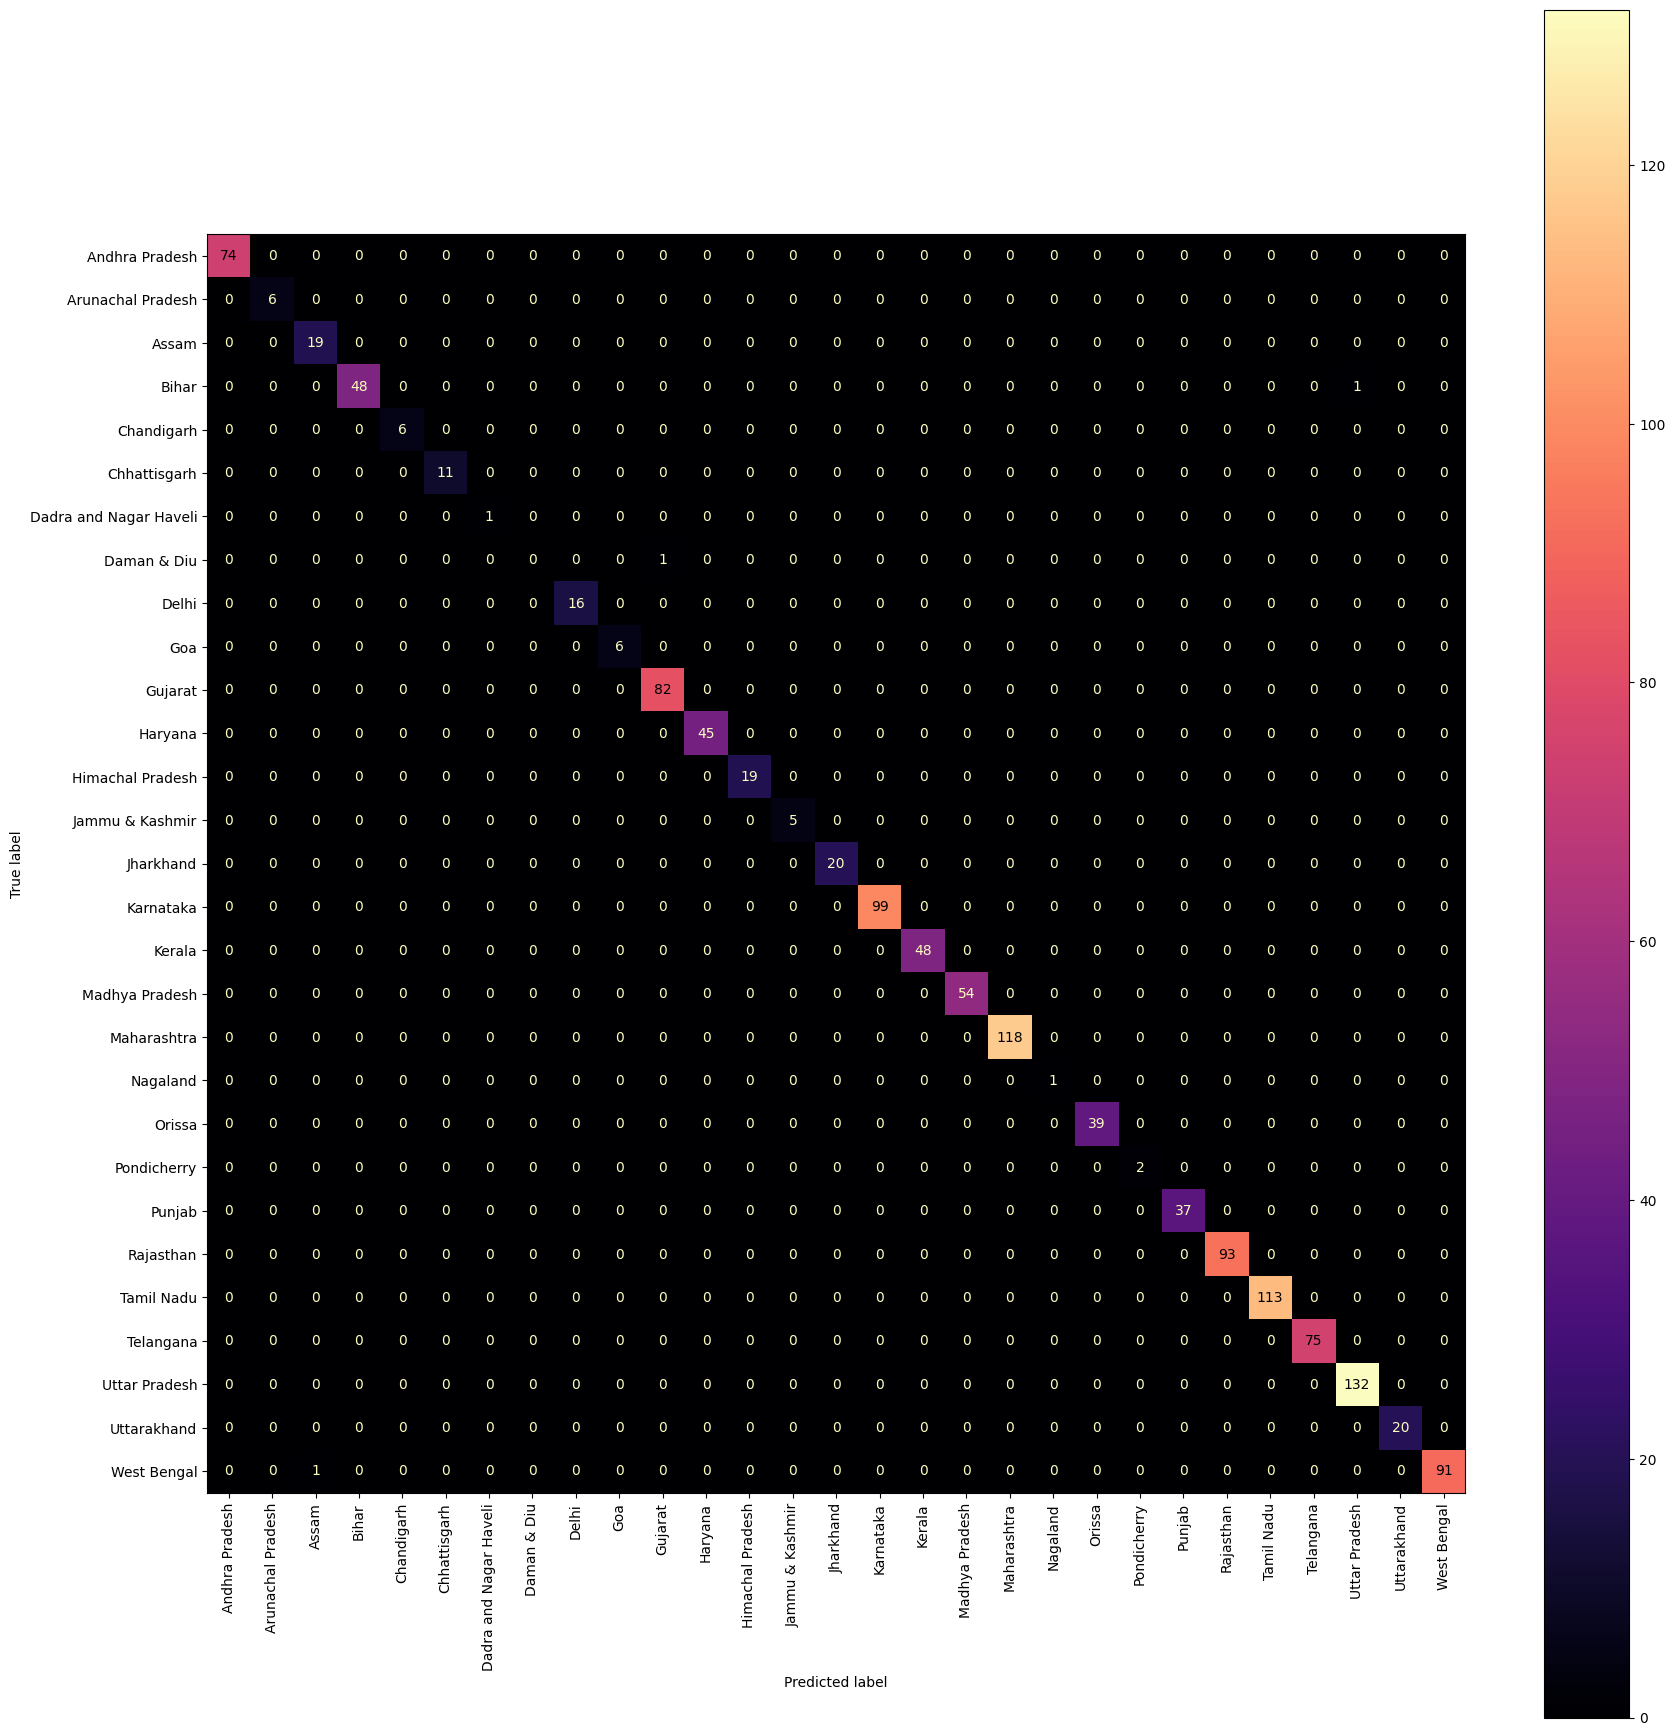

In [38]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 18)
labels = sorted(df_new_test['common_state'].unique())
# plt.figure(figsize=(4, 20))
disp = ConfusionMatrixDisplay(conf_matrix, 
                              display_labels=labels
                              )
# magma, plasma, cividis
disp.plot(cmap='magma')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

### Imputation of State

In [39]:
for route in ['source', 'destination']:
    df_ = df[[f'{route}_center_number',	f'{route}_center_code'	]].copy()
    df_.columns = ['common_center_number',	'common_center_code']
    df_['common_center_code'] = encoder.transform(df_[['common_center_code']])
    imputed_values = dt.predict(df_)
    df.loc[df[f'{route}_state'].isna(), f'{route}_state'] = imputed_values[df[f'{route}_state'].isna()]
    

### City prediction

In [40]:
# column_names = lambda x: [ 'data',f'{x}_center_number', f'{x}_center_code', f'{x}_state',f'{x}_city']
column_names = lambda x: [ 'data',f'{x}_center_number', f'{x}_center_code',f'{x}_city']
df1 = df[ column_names('source') ]
df1.columns = column_names('common')
df2 =  df[ column_names('destination') ]
df2.columns = column_names('common')
df_new = pd.concat([df1, df2]).dropna().drop_duplicates().reset_index(drop=True)
df_new.head()

,data,common_center_number,common_center_code,common_city
0,training,388121,AAA,Anand
1,training,388620,AAB,Khambhat
2,training,421302,AAG,Bhiwandi
3,training,400011,AAA,LowerParel
4,training,562132,AAA,Bangalore


In [41]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# df_new[['common_center_code', 'common_state']] = encoder.fit_transform(df_new[['common_center_code', 'common_state']])
df_new[['common_center_code']] = encoder.fit_transform(df_new[['common_center_code']])
df_new.head()

,data,common_center_number,common_center_code,common_city
0,training,388121,0.0,Anand
1,training,388620,1.0,Khambhat
2,training,421302,6.0,Bhiwandi
3,training,400011,0.0,LowerParel
4,training,562132,0.0,Bangalore


In [42]:
df_new.shape

(2862, 4)

In [43]:
df_new_train = df_new[df_new['data']=='training'].drop('data', axis=1)
df_new_test = df_new[df_new['data']!='training'].drop('data', axis=1)

In [44]:
dt = DecisionTreeClassifier()
# dt.fit(df_new_train[['common_center_number',	'common_center_code', 'common_state']], df_new_train['common_city'])
dt.fit(df_new_train[['common_center_number',	'common_center_code', ]], df_new_train['common_city'])

DecisionTreeClassifier()

In [45]:
# dt.score(df_new_train[['common_center_number',	'common_center_code', 'common_state']], df_new_train['common_city'])
dt.score(df_new_train[['common_center_number',	'common_center_code']], df_new_train['common_city'])

1.0

In [46]:
# dt.score(df_new_test[['common_center_number',	'common_center_code', 'common_state']], df_new_test['common_city']) 
dt.score(df_new_test[['common_center_number',	'common_center_code', ]], df_new_test['common_city']) 

0.9579111457521434

In [47]:
# 0.9579111457521434
# Number of Correct, Error Count
print("Correct: ", (df_new_test['common_city']== y_pred).sum())
print("Incorrect: ",(df_new_test['common_city']!= y_pred).sum())

Correct:  24
Incorrect:  1259


In [48]:
#  We can retrain the data
dt.fit(df_new[['common_center_number',	'common_center_code', ]], df_new['common_city'])

DecisionTreeClassifier()

In [49]:
print(dt.score(df_new_train[['common_center_number',	'common_center_code']], df_new_train['common_city']))
print(dt.score(df_new_test[['common_center_number',	'common_center_code', ]], df_new_test['common_city']))

1.0
1.0


### Imputation of City

In [50]:
for route in ['source', 'destination']:
    df_ = df[[f'{route}_center_number',	f'{route}_center_code'	]].copy()
    df_.columns = ['common_center_number',	'common_center_code']
    df_['common_center_code'] = encoder.transform(df_[['common_center_code']])
    imputed_values = dt.predict(df_)
    df.loc[df[f'{route}_city'].isna(), f'{route}_city'] = imputed_values[df[f'{route}_city'].isna()]
    

In [51]:
df = df.fillna('Unknown')

## Data Splitting

In [52]:
df[df['trip_uuid']=='trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,source_state,source_center_number,source_center_code,destination_city,destination_place,destination_code,destination_state,destination_center_number,destination_center_code,trip_year,trip_month,trip_day,trip_week,trip_dayofweek,trip_isHoliday,od_trip_time
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand,VUNagar,DC,Gujarat,388121,AAA,Khambhat,MotvdDPP,D,Gujarat,388620,AAB,2018,9,20,38,3,True,86
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand,VUNagar,DC,Gujarat,388121,AAA,Khambhat,MotvdDPP,D,Gujarat,388620,AAB,2018,9,20,38,3,True,86
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand,VUNagar,DC,Gujarat,388121,AAA,Khambhat,MotvdDPP,D,Gujarat,388620,AAB,2018,9,20,38,3,True,86
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Anand,VUNagar,DC,Gujarat,388121,AAA,Khambhat,MotvdDPP,D,Gujarat,388620,AAB,2018,9,20,38,3,True,86
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Anand,VUNagar,DC,Gujarat,388121,AAA,Khambhat,MotvdDPP,D,Gujarat,388620,AAB,2018,9,20,38,3,True,86
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109,True,9,2018-09-20 06:15:58.000000,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636,Khambhat,MotvdDPP,D,Gujarat,388620,AAB,Anand,Vaghasi,IP,Gujarat,388320,AAA,2018,9,20,38,3,True,109
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109,True,18,2018-09-20 05:47:29.000000,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667,Khambhat,MotvdDPP,D,Gujarat,388620,AAB,Anand,Vaghasi,IP,Gujarat,388320,AAA,2018,9,20,38,3,True,109
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_Motv

In [53]:
# Seggregating the unique features
df_unique = df[[ 'data', 'trip_uuid', 'trip_creation_time',	'route_schedule_uuid',	'route_type',
                 'trip_year', 'trip_month', 'trip_day', 'trip_week', 'trip_dayofweek', 'trip_isHoliday',
                ]].drop_duplicates()
df_unique.head()

,data,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,trip_year,trip_month,trip_day,trip_week,trip_dayofweek,trip_isHoliday
0,training,trip-153741093647649320,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,2018,9,20,38,3,True
10,training,trip-153768492602129387,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,FTL,2018,9,23,38,6,False
15,training,trip-153693976643699843,2018-09-14 15:42:46.437249,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,2018,9,14,37,4,False
17,training,trip-153687145942424248,2018-09-13 20:44:19.424489,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,2018,9,13,37,3,False
35,test,trip-153825970514894360,2018-09-29 22:21:45.149226,thanos::sroute:0904e75c-b3ac-4278-96cf-802835a...,FTL,2018,9,29,39,5,False


In [54]:
# Seggregating cumulative features
agg_dict = {
    'start_scan_to_end_scan' : ['sum', 'mean'],
    'od_trip_time' : ['sum', 'mean'],
}
df_cum = df[[ 'trip_uuid', 'start_scan_to_end_scan', 'od_trip_time']].drop_duplicates()\
            .groupby('trip_uuid').agg(agg_dict).reset_index()
df_cum

trip_uuid start_scan_to_end_scan         od_trip_time  \
                                                  sum    mean          sum   
0      trip-153671041653548748                   2259  1129.5         2261   
1      trip-153671042288605164                    180    90.0          182   
2      trip-153671043369099517                   3933  1966.5         3935   
3      trip-153671046011330457                    100   100.0          100   
4      trip-153671052974046625                    717   239.0          719   
...                        ...                    ...     ...          ...   
14812  trip-153861095625827784                    257   128.5          258   
14813  trip-153861104386292051                     60    60.0           61   
14814  trip-153861106442901555                    421   210.5          422   
14815  trip-153861115439069069                    347    69.4          348   
14816  trip-153861118270144424                    353   176.5          354   

                    
              mean  
0      1130.500000  
1        91.000000  
2      1967.500000  
3       100.000000  
4       239.666667  
...            ...  
14812   129.000000  
14813    61.000000  
14814   211.000000  
14815    69.600000  
14816   177.000000  

[14817 rows x 5 columns]

In [55]:
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1499
destination_center                  1481
destination_name                    1469
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
source_city     

## Some More Analysis

### Correlation between `cutoff_factor` and `actual_distance_to_destination`

In [56]:
df[['cutoff_factor', 'actual_distance_to_destination']]

,cutoff_factor,actual_distance_to_destination
0,9,10.435660
1,18,18.936842
2,27,27.637279
3,36,36.118028
4,39,39.386040
...,...,...
144862,45,45.258278
144863,54,54.092531
144864,63,66.163591
144865,72,73.680667


In [57]:
df[['cutoff_factor', 'actual_distance_to_destination']].corr().iloc[0,1]

np.float64(0.9999859454678397)

### Correlation between `start_scan_to_end_scan` and `od_trip_time`

In [58]:
df[['start_scan_to_end_scan', 'od_trip_time']].corr().iloc[0,1]

np.float64(0.9999998837669541)

### Top Exporters

In [59]:
x = df[['trip_uuid', 'source_state']].drop_duplicates()
x['source_state'].value_counts()


source_state
Maharashtra               2748
Karnataka                 2325
Haryana                   1839
Tamil Nadu                1109
Uttar Pradesh              904
Telangana                  827
Delhi                      793
Gujarat                    774
West Bengal                682
Punjab                     643
Rajasthan                  551
Andhra Pradesh             516
Madhya Pradesh             409
Bihar                      382
Kerala                     297
Assam                      273
Jharkhand                  175
Orissa                     170
Uttarakhand                164
Chandigarh                 123
Himachal Pradesh           103
Goa                         65
Arunachal Pradesh           44
Chhattisgarh                43
Jammu & Kashmir             24
Pondicherry                 19
Dadra and Nagar Haveli      15
Meghalaya                   12
Nagaland                     5
Mizoram                      5
Tripura                      1
Name: count, dtype: int64

### Top Importers

In [60]:
x = df[['trip_uuid', 'destination_state']].drop_duplicates()
x['destination_state'].value_counts()

destination_state
Maharashtra               2637
Karnataka                 2426
Haryana                   1805
Tamil Nadu                1097
Uttar Pradesh              910
Telangana                  857
Gujarat                    791
West Bengal                713
Punjab                     693
Delhi                      675
Rajasthan                  575
Andhra Pradesh             522
Madhya Pradesh             432
Bihar                      384
Kerala                     303
Assam                      249
Jharkhand                  197
Orissa                     187
Uttarakhand                159
Himachal Pradesh           101
Chandigarh                  91
Goa                         74
Chhattisgarh                43
Arunachal Pradesh           42
Jammu & Kashmir             25
Pondicherry                 24
Dadra and Nagar Haveli      17
Meghalaya                   11
Mizoram                      7
Tripura                      1
Daman & Diu                  1
Nagaland             

### Top Intra Trading 
When source and destination is same state

In [61]:
x = df[['trip_uuid', 'source_state', 'destination_state']].drop_duplicates()
x = x[x['source_state']==x['destination_state']]
x['destination_state'].value_counts()

destination_state
Maharashtra          2487
Karnataka            2130
Tamil Nadu           1048
Haryana               811
Uttar Pradesh         713
Gujarat               697
Telangana             684
West Bengal           610
Rajasthan             457
Punjab                421
Andhra Pradesh        381
Bihar                 361
Madhya Pradesh        306
Kerala                275
Assam                 214
Delhi                 189
Jharkhand             157
Uttarakhand           126
Orissa                106
Himachal Pradesh       74
Chhattisgarh           43
Chandigarh             39
Goa                    31
Jammu & Kashmir        24
Arunachal Pradesh      15
Mizoram                 4
Meghalaya               2
Tripura                 1
Name: count, dtype: int64

### Top Inter Trading
Source and destination state are different.

In [62]:
x = df[['trip_uuid', 'source_state', 'destination_state']].drop_duplicates()
x = x[x['source_state']!=x['destination_state']]
x['source_state'].value_counts()

source_state
Haryana                   1043
Delhi                      604
Maharashtra                310
Uttar Pradesh              302
Karnataka                  287
Punjab                     242
Andhra Pradesh             170
Telangana                  165
Madhya Pradesh             149
Gujarat                    122
Chandigarh                 121
Rajasthan                  115
Tamil Nadu                 102
Assam                       76
Orissa                      72
West Bengal                 72
Himachal Pradesh            69
Uttarakhand                 56
Kerala                      45
Goa                         43
Bihar                       37
Jharkhand                   32
Arunachal Pradesh           31
Pondicherry                 19
Dadra and Nagar Haveli      15
Meghalaya                   11
Jammu & Kashmir             10
Nagaland                     5
Mizoram                      1
Name: count, dtype: int64

In [63]:
x['destination_state'].value_counts()

destination_state
Haryana                   1009
Delhi                      486
Karnataka                  339
Punjab                     322
Uttar Pradesh              322
Telangana                  223
Maharashtra                218
Andhra Pradesh             176
Madhya Pradesh             157
Rajasthan                  146
Gujarat                    122
West Bengal                103
Himachal Pradesh            87
Chandigarh                  84
Orissa                      84
Tamil Nadu                  79
Assam                       58
Uttarakhand                 54
Goa                         43
Bihar                       42
Jharkhand                   40
Arunachal Pradesh           37
Kerala                      29
Pondicherry                 24
Dadra and Nagar Haveli      17
Meghalaya                   11
Jammu & Kashmir              8
Mizoram                      3
Tripura                      1
Daman & Diu                  1
Nagaland                     1
Name: count, dtype: i

In [64]:
source_counts = x['source_state'].value_counts().rename('source_count')
destination_counts = x['destination_state'].value_counts().rename('destination_count')

# Combine both into a single DataFrame
state_counts = pd.concat([source_counts, destination_counts], axis=1).fillna(0)

# Convert to integer if needed
state_counts = state_counts.astype(int)

print(state_counts)


                        source_count  destination_count
Haryana                         1043               1009
Delhi                            604                486
Maharashtra                      310                218
Uttar Pradesh                    302                322
Karnataka                        287                339
Punjab                           242                322
Andhra Pradesh                   170                176
Telangana                        165                223
Madhya Pradesh                   149                157
Gujarat                          122                122
Chandigarh                       121                 84
Rajasthan                        115                146
Tamil Nadu                       102                 79
Assam                             76                 58
Orissa                            72                 84
West Bengal                       72                103
Himachal Pradesh                  69            

### Which state imports more and exports more?

In [65]:
state_counts['trade_diff'] = state_counts['source_count' ] - state_counts['destination_count']
state_counts.sort_values('trade_diff', ascending = False)

,source_count,destination_count,trade_diff
Delhi,604,486,118
Maharashtra,310,218,92
Chandigarh,121,84,37
Haryana,1043,1009,34
Tamil Nadu,102,79,23
Assam,76,58,18
Kerala,45,29,16
Nagaland,5,1,4
Jammu & Kashmir,10,8,2
Uttarakhand,56,54,2


### Trip Creation Frequency

In [66]:
trip_df = df[['trip_uuid','trip_creation_time']].drop_duplicates().sort_values('trip_creation_time')\
    .reset_index(drop=True)
trip_df['time_diff'] = trip_df['trip_creation_time'].diff()
trip_df = trip_df.drop(0).reset_index(drop=True)
trip_df['time_diff'] = pd.to_timedelta(trip_df['time_diff']).dt.total_seconds()
trip_df

,trip_uuid,trip_creation_time,time_diff
0,trip-153671042288605164,2018-09-12 00:00:22.886430,6.350689
1,trip-153671043369099517,2018-09-12 00:00:33.691250,10.804820
2,trip-153671046011330457,2018-09-12 00:01:00.113710,26.422460
3,trip-153671052974046625,2018-09-12 00:02:09.740725,69.627015
4,trip-153671055416136166,2018-09-12 00:02:34.161600,24.420875
...,...,...,...
14811,trip-153861095625827784,2018-10-03 23:55:56.258533,37.827869
14812,trip-153861104386292051,2018-10-03 23:57:23.863155,87.604622
14813,trip-153861106442901555,2018-10-03 23:57:44.429324,20.566169
14814,trip-153861115439069069,2018-10-03 23:59:14.390954,89.961630


In [67]:
avg_waiting_time = trip_df['time_diff'].mean()
avg_waiting_time

np.float64(128.29145288546167)

In [68]:
trip_df[['time_diff']].describe().T

,count,mean,std,min,25%,50%,75%,max
time_diff,14816.0,128.291453,164.911181,0.007974,30.173704,75.35047,164.057606,4584.50296


In [69]:
trip_df ['time_diff_category'] = pd.cut(trip_df['time_diff'], bins = [0,60, 120, 300, 600, 1200,5000])
trip_df ['time_diff_category'].value_counts()

time_diff_category
(0, 60]         6346
(120, 300]      3660
(60, 120]       3307
(300, 600]      1194
(600, 1200]      277
(1200, 5000]      32
Name: count, dtype: int64

In [70]:
IQR = trip_df['time_diff'].quantile(.75)-trip_df['time_diff'].quantile(.25)
time_median = trip_df['time_diff'].median()
higher_bound = time_median + 1.5*IQR
higher_bound

np.float64(276.17632137500004)

In [71]:
time_diff = trip_df['time_diff'][trip_df['time_diff']<=1200]
time_diff

0         6.350689
1        10.804820
2        26.422460
3        69.627015
4        24.420875
           ...    
14811    37.827869
14812    87.604622
14813    20.566169
14814    89.961630
14815    28.310738
Name: time_diff, Length: 14784, dtype: float64

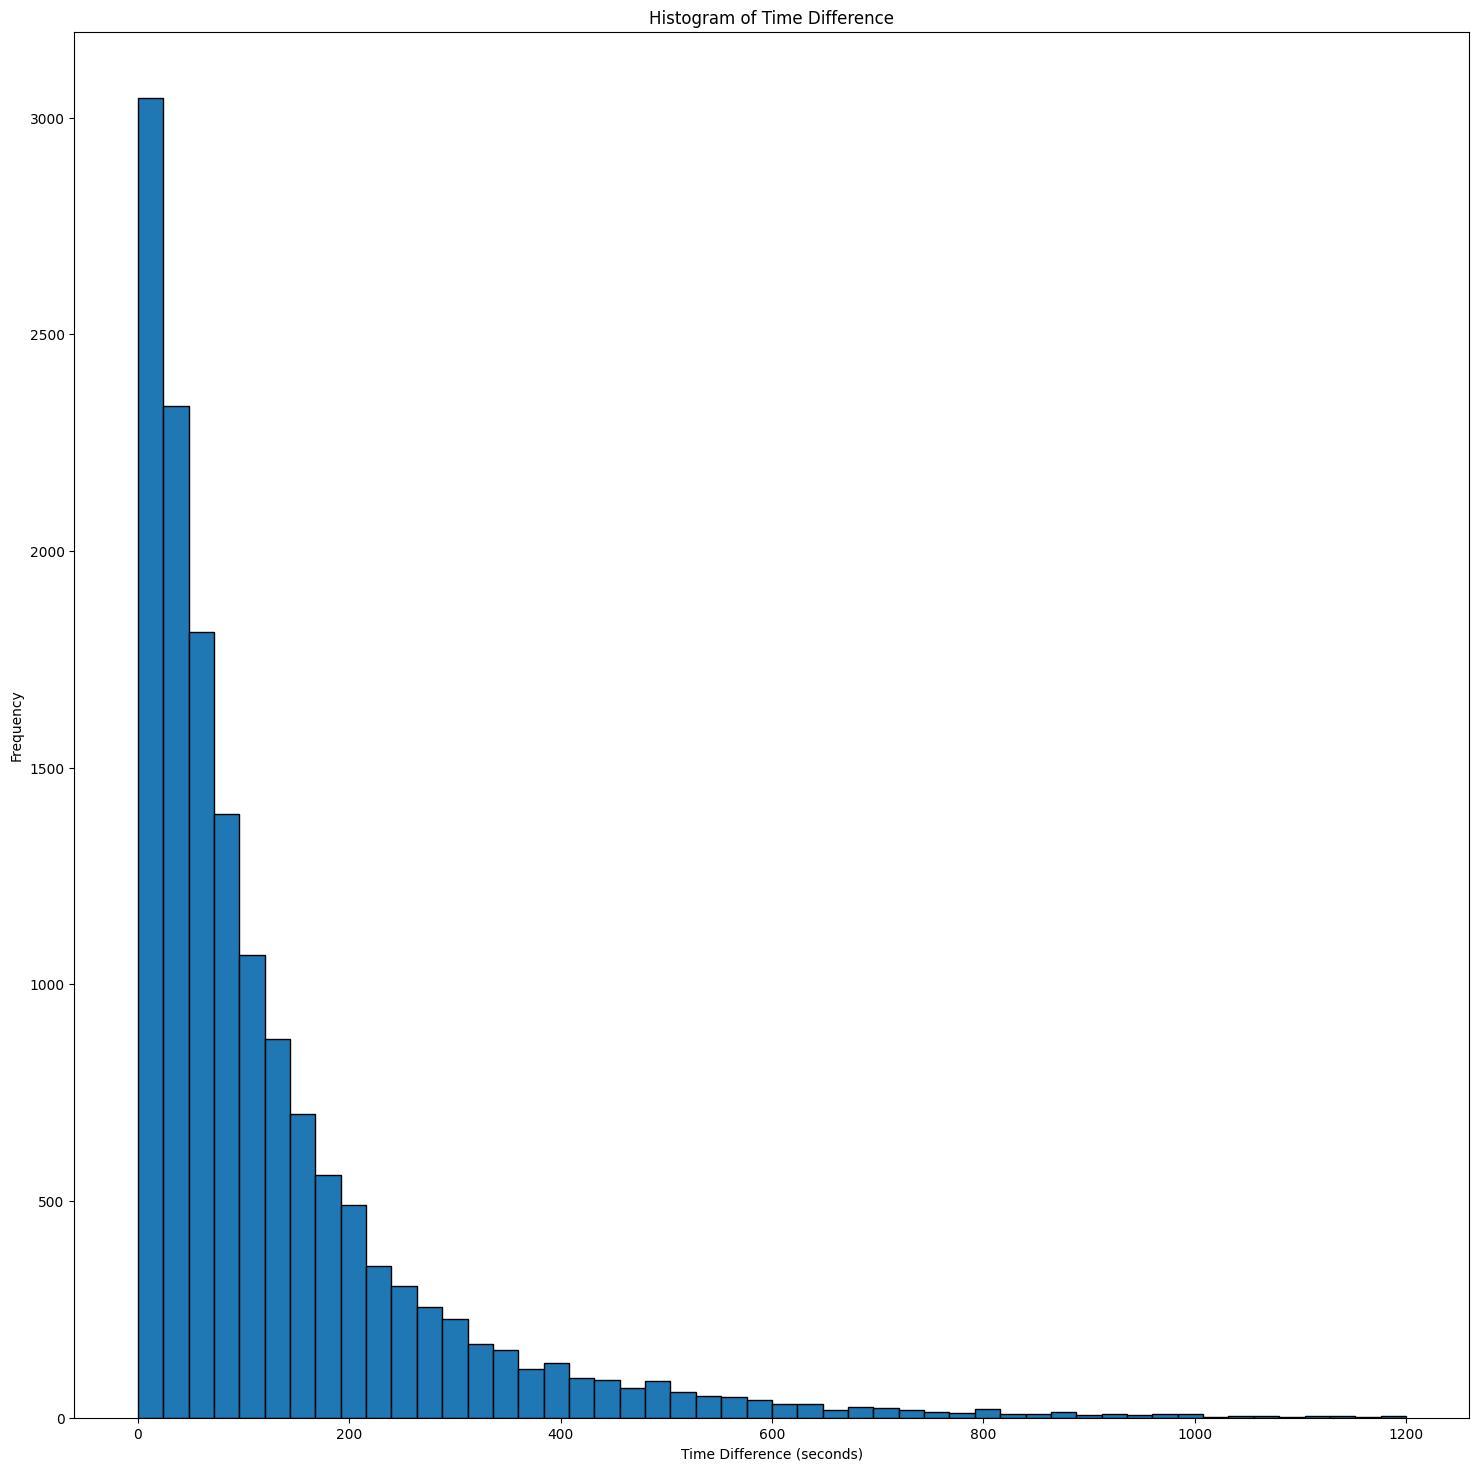

In [72]:
plt.hist(time_diff, bins=50, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Difference')
plt.show()

Mean: 125.1147, Variance: 21672.7861
Mean²: 15653.6799 (should be ≈ variance)


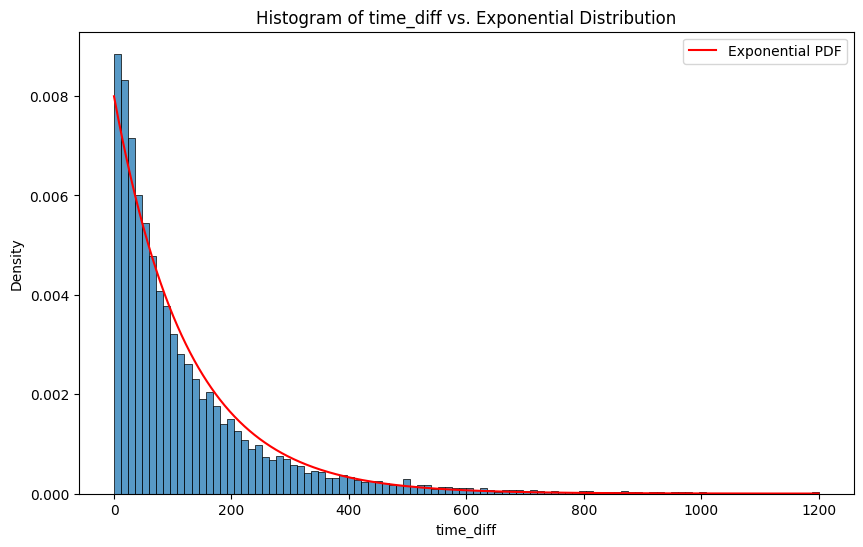

<Figure size 1000x600 with 0 Axes>

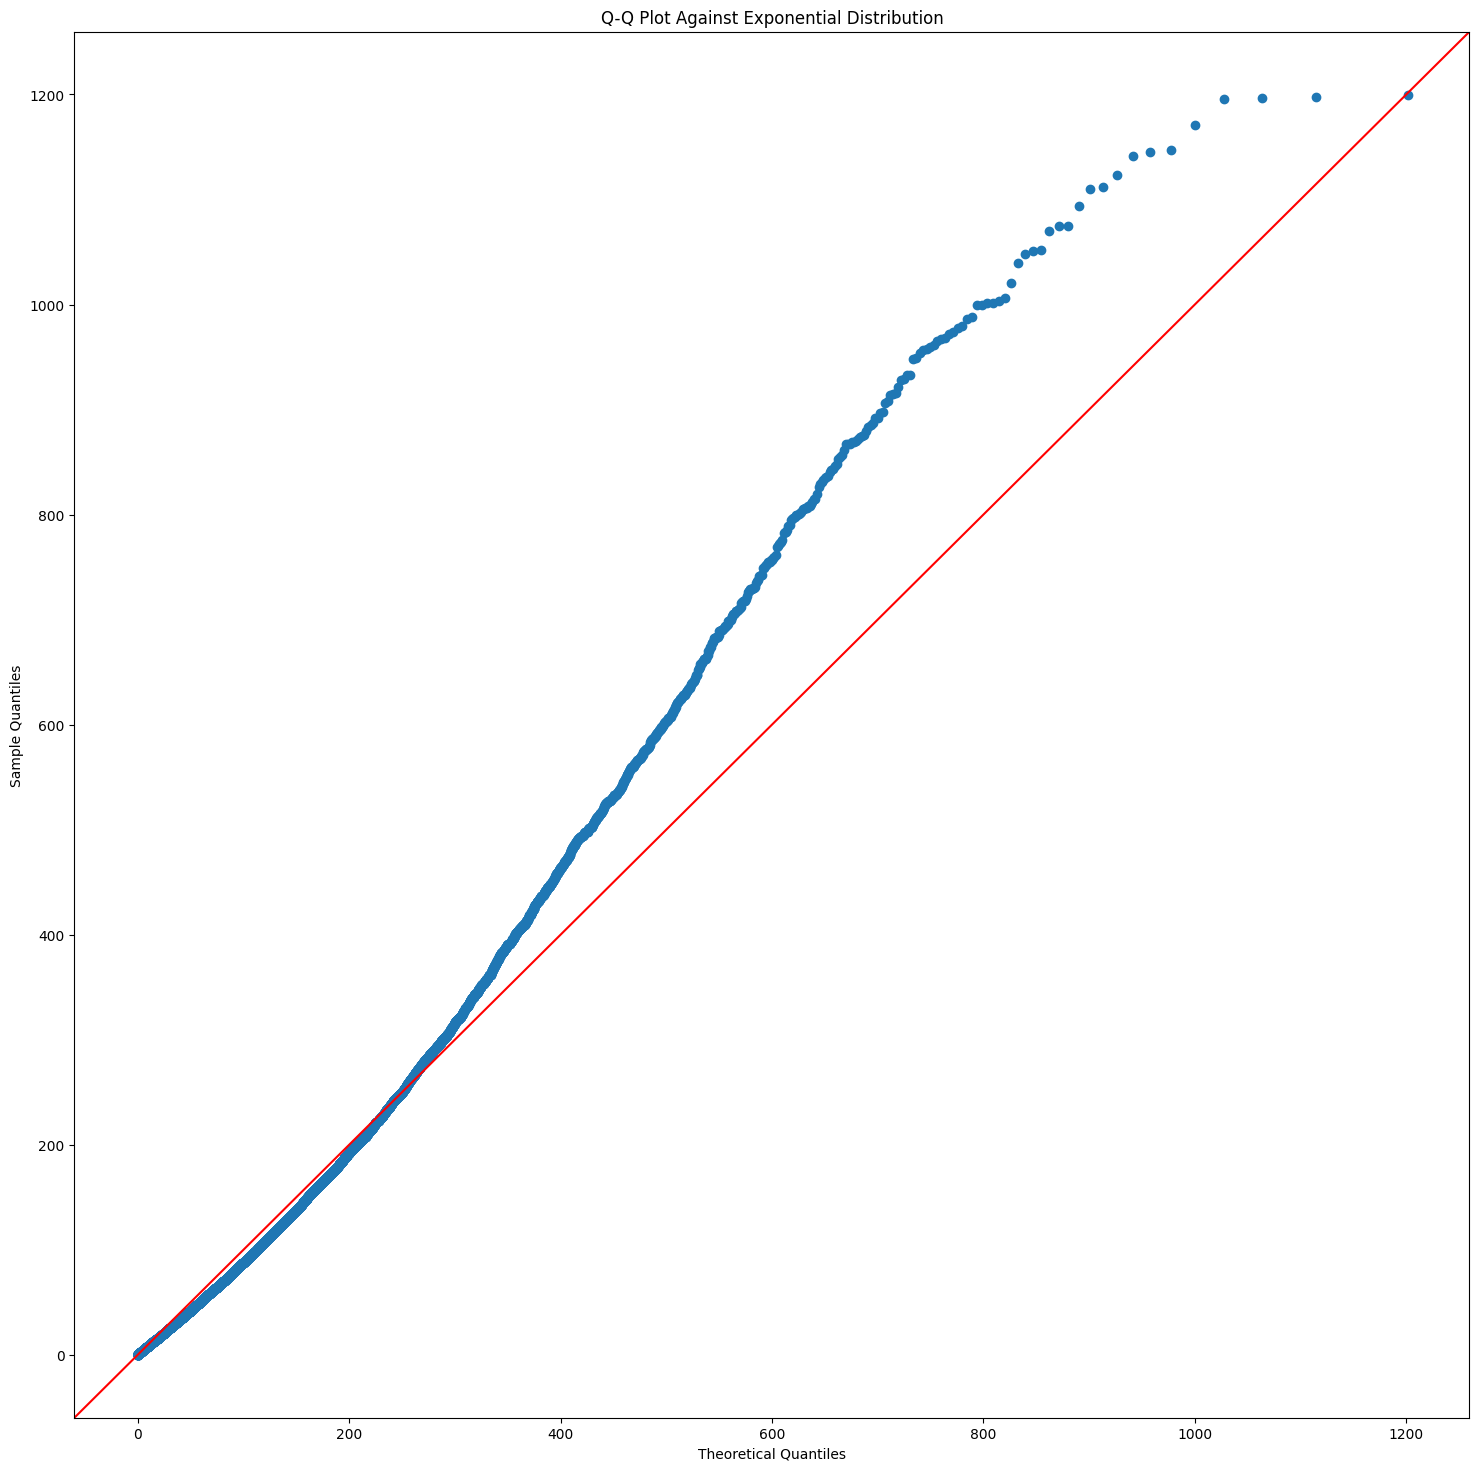

KS Test: Statistic = 0.0503, p-value = 0.0000
AD Test: Statistic = 82.8628
Critical Values:
  15.0%: 0.9220
  10.0%: 1.0780
  5.0%: 1.3410
  2.5%: 1.6060
  1.0%: 1.9570


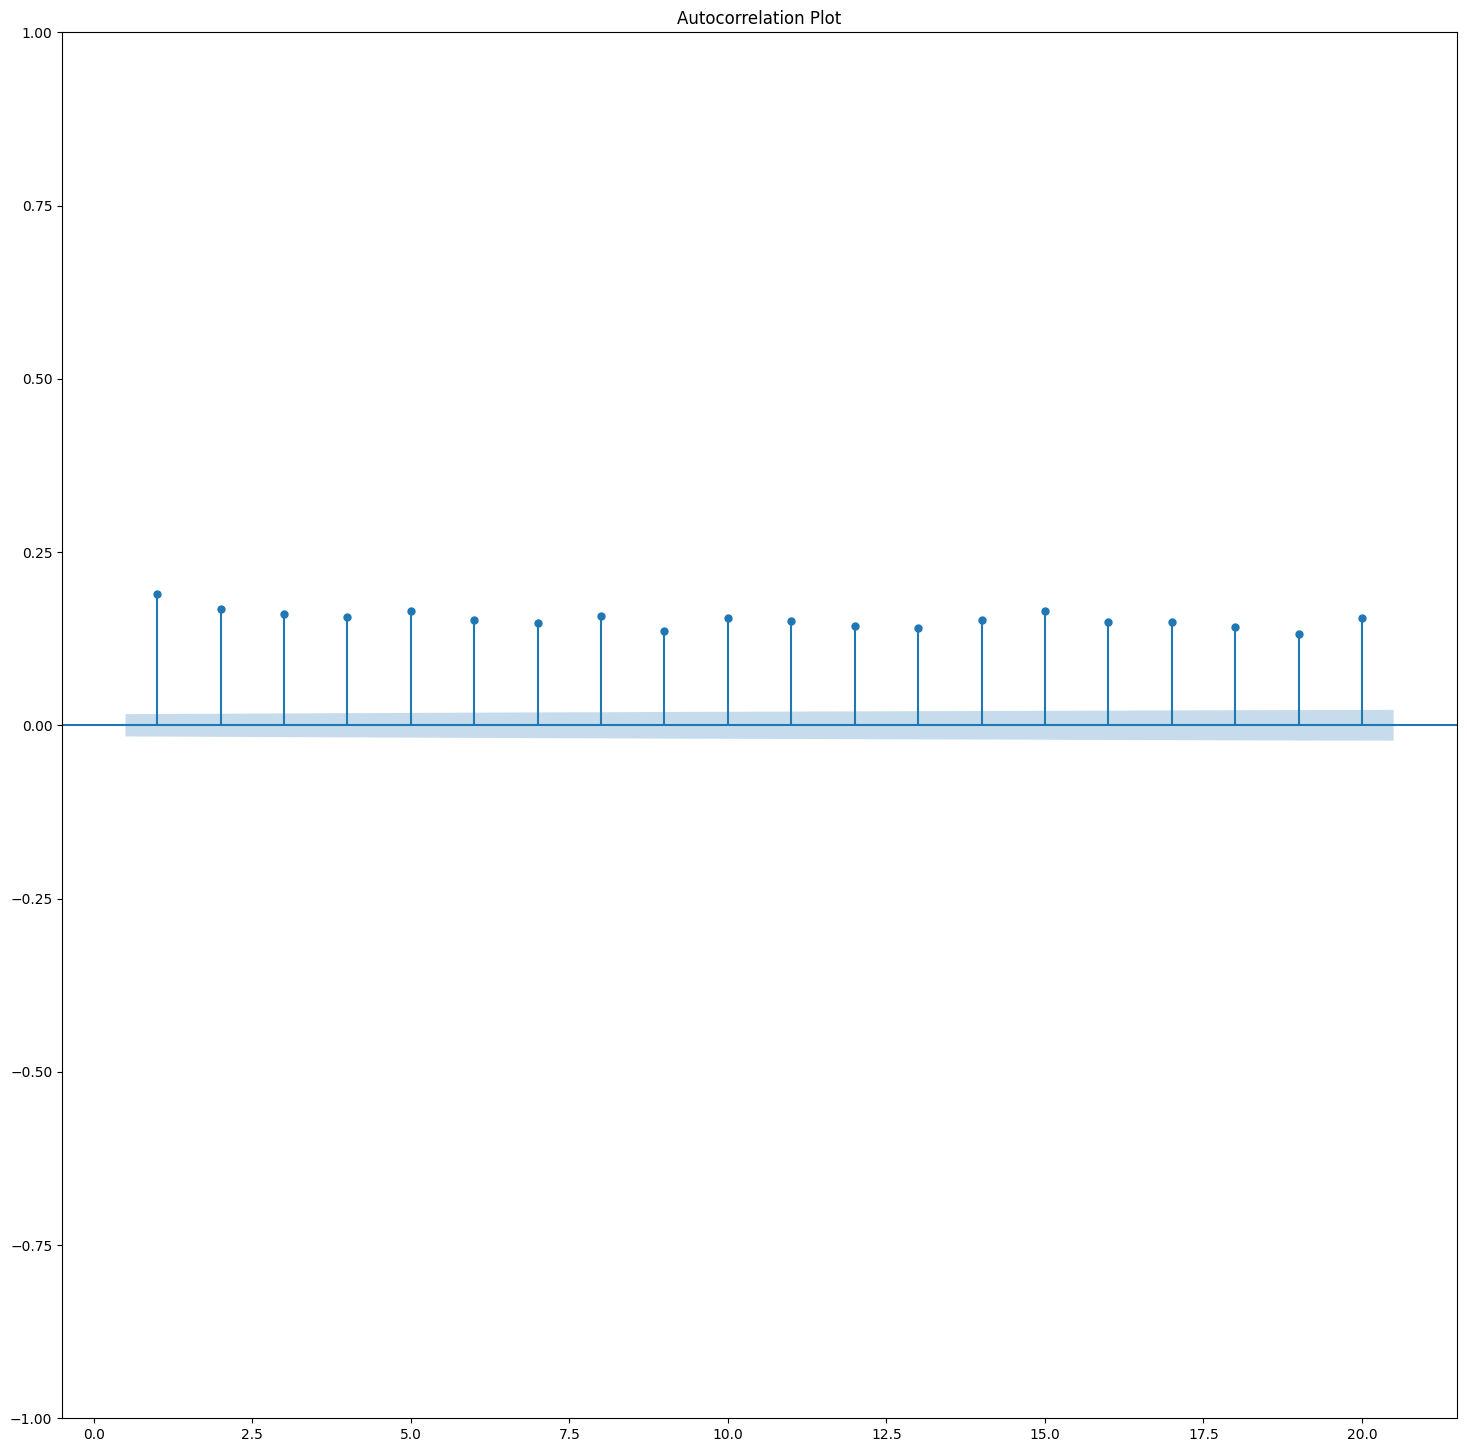


Ljung-Box Test (H0: No autocorrelation):
         lb_stat  lb_pvalue
10   3751.221498        0.0
20   6994.376118        0.0
30   9927.251180        0.0
40  12339.686524        0.0
50  14663.157012        0.0


In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf


# ----------------------------------------
# 1. Check Exponential Distribution
# ----------------------------------------

# a. Mean and Variance Check
mean_td = time_diff.mean()
var_td = time_diff.var()
print(f"Mean: {mean_td:.4f}, Variance: {var_td:.4f}")
print(f"Mean²: {mean_td**2:.4f} (should be ≈ variance)")

# b. Histogram vs. Exponential PDF
plt.figure(figsize=(10, 6))
sns.histplot(time_diff, stat='density', kde=False, bins=100)
x = np.linspace(0, time_diff.max(), 1000)
plt.plot(x, stats.expon.pdf(x, scale=mean_td), 'r-', label='Exponential PDF')
plt.title('Histogram of time_diff vs. Exponential Distribution')
plt.legend()
plt.show()

# c. Q-Q Plot
plt.figure(figsize=(10, 6))
qqplot(time_diff, dist=stats.expon, loc=0, scale=mean_td, line='45')
plt.title('Q-Q Plot Against Exponential Distribution')
plt.show()

# d. Kolmogorov-Smirnov Test
ks_stat, ks_p = stats.kstest(time_diff, 'expon', args=(0, mean_td))
print(f"KS Test: Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")

# e. Anderson-Darling Test (requires normalization)
normalized_td = time_diff / mean_td  # Scale to match λ=1
ad_result = stats.anderson(normalized_td, dist='expon')
print(f"AD Test: Statistic = {ad_result.statistic:.4f}")
print("Critical Values:")
for cv, sl in zip(ad_result.critical_values, ad_result.significance_level):
    print(f"  {sl}%: {cv:.4f}")

# ----------------------------------------
# 2. Check Independence
# ----------------------------------------

# a. Autocorrelation Plot
plot_acf(time_diff, lags=20, zero=False, alpha=0.05)
plt.title('Autocorrelation Plot')
plt.show()

# b. Ljung-Box Test (for lags=10)
lb_test = acorr_ljungbox(time_diff, lags=[10, 20, 30, 40, 50], return_df=True)
print("\nLjung-Box Test (H0: No autocorrelation):")
print(lb_test)

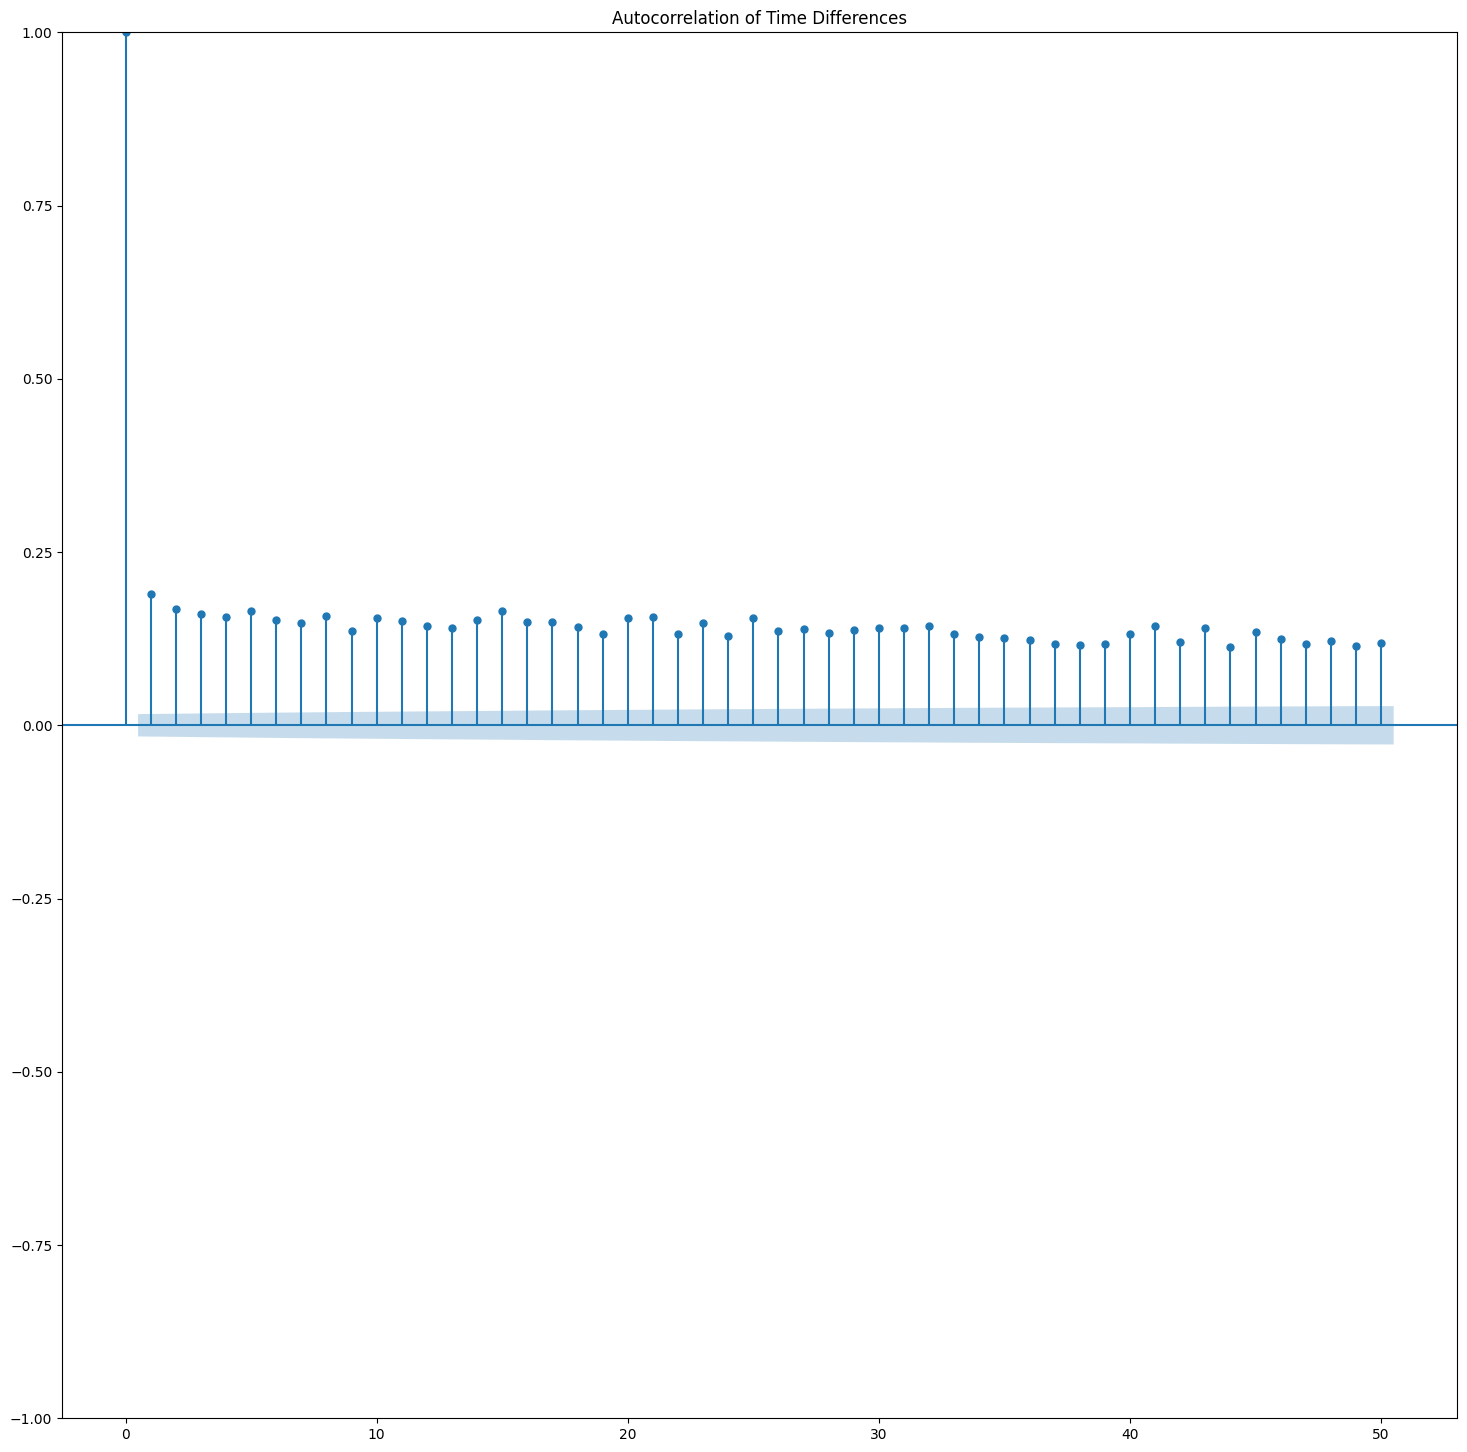

In [74]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(time_diff, lags=50)
plt.title('Autocorrelation of Time Differences')
plt.show()


### 

In [75]:
pd.DataFrame({ 'Significance Level':ad_result.significance_level, 'Critical Values':ad_result.critical_values,})

,Significance Level,Critical Values
0,15.0,0.922
1,10.0,1.078
2,5.0,1.341
3,2.5,1.606
4,1.0,1.957


### Testing our given empirical formula

1. $$ factor = \frac{actual\_time}{osrm\_time}$$
1. $$ segment\_factor = \frac{segment\_actual\_time}{segment\_osrm\_time}$$

In [76]:
np.corrcoef(df['factor'], df['actual_time']/df['osrm_time'])

array([[1., 1.],
       [1., 1.]])

In [77]:
dx = df[['segment_actual_time', 'segment_osrm_time', 'segment_factor']].copy()
dx['segment_factor_est'] = np.where(dx['segment_osrm_time']==0,-1,dx['segment_actual_time']/(dx['segment_osrm_time']))

In [78]:
dx.isna().sum()

segment_actual_time    0
segment_osrm_time      0
segment_factor         0
segment_factor_est     0
dtype: int64

In [79]:
np.corrcoef(dx['segment_factor'], dx['segment_factor_est'])

array([[1., 1.],
       [1., 1.]])

### How are factors dependent on holidays?

For each factor (`factor` and `segment_factor`):

- Null Hypothesis ($H_0$): The mean of the factor on holidays and non-holidays is the same.
- Alternative Hypothesis ($H_1$): The mean of the factor on non-holidays is significantly higher than on holidays.

Mathematically:
$$ H_0 : \mu_{non-holiday} = \mu_{non-holiday}$$
$$ H_1 : \mu_{non-holiday} > \mu_{non-holiday}$$

In [80]:
df[['trip_isHoliday', 'factor', 'segment_factor']].groupby('trip_isHoliday').agg({
    'factor': ['mean', 'std'],
    'segment_factor': ['mean', 'std'],
},).reset_index()

trip_isHoliday    factor           segment_factor          
                      mean       std           mean       std
0          False  2.121669  1.727765       2.223451  4.966922
1           True  2.103883  1.581457       2.165565  3.364993

In [81]:
holiday = df[df['trip_isHoliday'] == True]
non_holiday = df[df['trip_isHoliday'] == False]

# Perform Welch's t-test (one-tailed) for `factor`
t_stat_factor, p_value_factor = stats.ttest_ind(
    non_holiday['factor'], holiday['factor'], equal_var=False, alternative='greater'
)

# Perform Welch's t-test (one-tailed) for `segment_factor`
t_stat_segment, p_value_segment = stats.ttest_ind(
    non_holiday['segment_factor'], holiday['segment_factor'], equal_var=False, alternative='greater'
)

# Print results
print(f"Factor T-test: t-statistic = {t_stat_factor:.4f}, p-value = {p_value_factor:.4f}")
print(f"Segment Factor T-test: t-statistic = {t_stat_segment:.4f}, p-value = {p_value_segment:.4f}")

# Interpretation
alpha = 0.05  # Significance level

if p_value_factor < alpha:
    print("Factor: Non-holiday values are significantly higher than holiday values (Reject H0).")
else:
    print("Factor: No significant difference (Fail to reject H0).")

if p_value_segment < alpha:
    print("Segment Factor: Non-holiday values are significantly higher than holiday values (Reject H0).")
else:
    print("Segment Factor: No significant difference (Fail to reject H0).")

Factor T-test: t-statistic = 1.2013, p-value = 0.1148
Segment Factor T-test: t-statistic = 1.7640, p-value = 0.0389
Factor: No significant difference (Fail to reject H0).
Segment Factor: Non-holiday values are significantly higher than holiday values (Reject H0).


### Segment Analysis

In [82]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()


df[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144862,92.0,65.3487,94.0
144863,118.0,82.7212,115.0
144864,138.0,103.4265,149.0
144865,155.0,122.3150,176.0


In [83]:
create_segment_dict = {

    'trip_uuid'     : 'first',
    'trip_year'     : 'first',
    'trip_month'    : 'first', 
    'trip_day'      : 'first', 
    'trip_week'     : 'first', 
    'trip_dayofweek': 'first',
    'trip_isHoliday': 'first',
    
    # 'source_center' : 'first',
    # 'source_name'   : 'first',
    'source_city'   : 'first', 
    'source_place'  : 'first', 
    'source_code'   : 'first', 
    'source_state'  : 'first',

    # 'destination_center'    : 'last',
    # 'destination_name'      : 'last',
    'destination_city'      : 'last'  ,
    'destination_place'     : 'last', 
    'destination_code'      : 'last', 
    'destination_state'     : 'last',

    'od_start_time'         : 'first',
    'od_end_time'           : 'first',
    'start_scan_to_end_scan': 'first',
    'od_trip_time'          : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',

    }

In [84]:
segment = df.groupby('segment_key').agg(create_segment_dict).reset_index(drop=True)
segment

,trip_uuid,trip_year,trip_month,trip_day,trip_week,trip_dayofweek,trip_isHoliday,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,od_start_time,od_end_time,start_scan_to_end_scan,od_trip_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748,2018,9,12,37,2,False,Kanpur,Central,H,Uttar Pradesh,Gurgaon,Bilaspur,HB,Haryana,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260,1261,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,2018,9,12,37,2,False,Bhopal,Trnsport,H,Madhya Pradesh,Kanpur,Central,H,Uttar Pradesh,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999,1000,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,2018,9,12,37,2,False,Doddablpur,ChikaDPP,D,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58,59,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,2018,9,12,37,2,False,Tumkur,Veersagr,I,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122,123,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,2018,9,12,37,2,False,Gurgaon,Bilaspur,HB,Haryana,Chandigarh,Mehmdpur,H,Punjab,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834,835,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,2018,10,3,40,2,False,Tirchchndr,Shnmgprm,D,Tamil Nadu,Thisayanvilai,UdnkdiRD,D,Tamil Nadu,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62,62,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26364,trip-153861115439069069,2018,10,3,40,2,False,Peikulam,SriVnktpm,D,Tamil Nadu,Tirunelveli,VdkkuSrt,I,Tamil Nadu,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91,91,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26365,trip-153861115439069069,2018,10,3,40,2,False,Eral,Busstand,D,Tamil Nadu,Tirchchndr,Shnmgprm,D,Tamil Nadu,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44,44,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26366,trip-153861118270144424,2018,10,3,40,2,False,Sandur,WrdN1DPP,D,Karnataka,Bellary,Dc,Unknown,Karnataka,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287,287,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


In [85]:
np.corrcoef(segment['actual_time'], segment['segment_actual_time_sum'])[0][1]

np.float64(0.999988189643451)

In [86]:
np.corrcoef(segment['osrm_time'], segment['segment_osrm_time_sum'])

array([[1.        , 0.99226893],
       [0.99226893, 1.        ]])

In [87]:
np.corrcoef(segment['osrm_distance'], segment['segment_osrm_distance_sum'])

array([[1.        , 0.99431094],
       [0.99431094, 1.        ]])

In [88]:
create_trip_dict = {
    'trip_month'    : 'first', 
    'trip_day'      : 'first', 
    'trip_week'     : 'first', 
    'trip_dayofweek': 'first',
    'trip_isHoliday': 'first',
    
    # 'source_center' : 'first',
    # 'source_name'   : 'first',
    'source_city'   : 'first', 
    'source_place'  : 'first', 
    'source_code'   : 'first', 
    'source_state'  : 'first',

    # 'destination_center'    : 'last',
    # 'destination_name'      : 'last',
    'destination_city'      : 'last'  ,
    'destination_place'     : 'last', 
    'destination_code'      : 'last', 
    'destination_state'     : 'last',

    'od_start_time'         : 'first',
    'od_end_time'           : 'last',
    'start_scan_to_end_scan': 'sum',
    'od_trip_time'          : 'sum',

    'actual_distance_to_destination': 'sum',
    'actual_time'                   : 'sum',
    'osrm_time'                     : 'sum',
    'osrm_distance'                 : 'sum',

    'segment_actual_time_sum'   : 'sum',
    'segment_osrm_time_sum'     : 'sum',
    'segment_osrm_distance_sum' : 'sum',
}

In [89]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)
trip.head()

,trip_month,trip_day,trip_week,trip_dayofweek,trip_isHoliday,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,od_start_time,od_end_time,start_scan_to_end_scan,od_trip_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,9,12,37,2,False,Kanpur,Central,H,Uttar Pradesh,Kanpur,Central,H,Uttar Pradesh,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,2259,2261,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,9,12,37,2,False,Doddablpur,ChikaDPP,D,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,180,182,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,9,12,37,2,False,Gurgaon,Bilaspur,HB,Haryana,Gurgaon,Bilaspur,HB,Haryana,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,3933,3935,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,9,12,37,2,False,Mumbai Hub,Unknown,Unknown,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100,100,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,9,12,37,2,False,Bellary,Dc,Unknown,Karnataka,Sandur,WrdN1DPP,D,Karnataka,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,717,719,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


In [90]:
trip['trip_month'].value_counts()

trip_month
9     13029
10     1788
Name: count, dtype: int64

In [91]:
trip['trip_week'].value_counts()

trip_week
38    5004
39    4417
37    3608
40    1788
Name: count, dtype: Int64

In [92]:
np.corrcoef(trip['start_scan_to_end_scan'], trip['od_trip_time'])

array([[1.        , 0.99999912],
       [0.99999912, 1.        ]])

In [93]:
trip['trip_isHoliday'].value_counts()

trip_isHoliday
False    13561
True      1256
Name: count, dtype: int64

### Numerical Analysis

In [94]:
num_cols = [ 'start_scan_to_end_scan',	'od_trip_time',	'actual_distance_to_destination',	'actual_time',	
             'osrm_time',	'osrm_distance',	'segment_actual_time_sum',	'segment_osrm_time_sum',	'segment_osrm_distance_sum'
             ]

<Axes: >

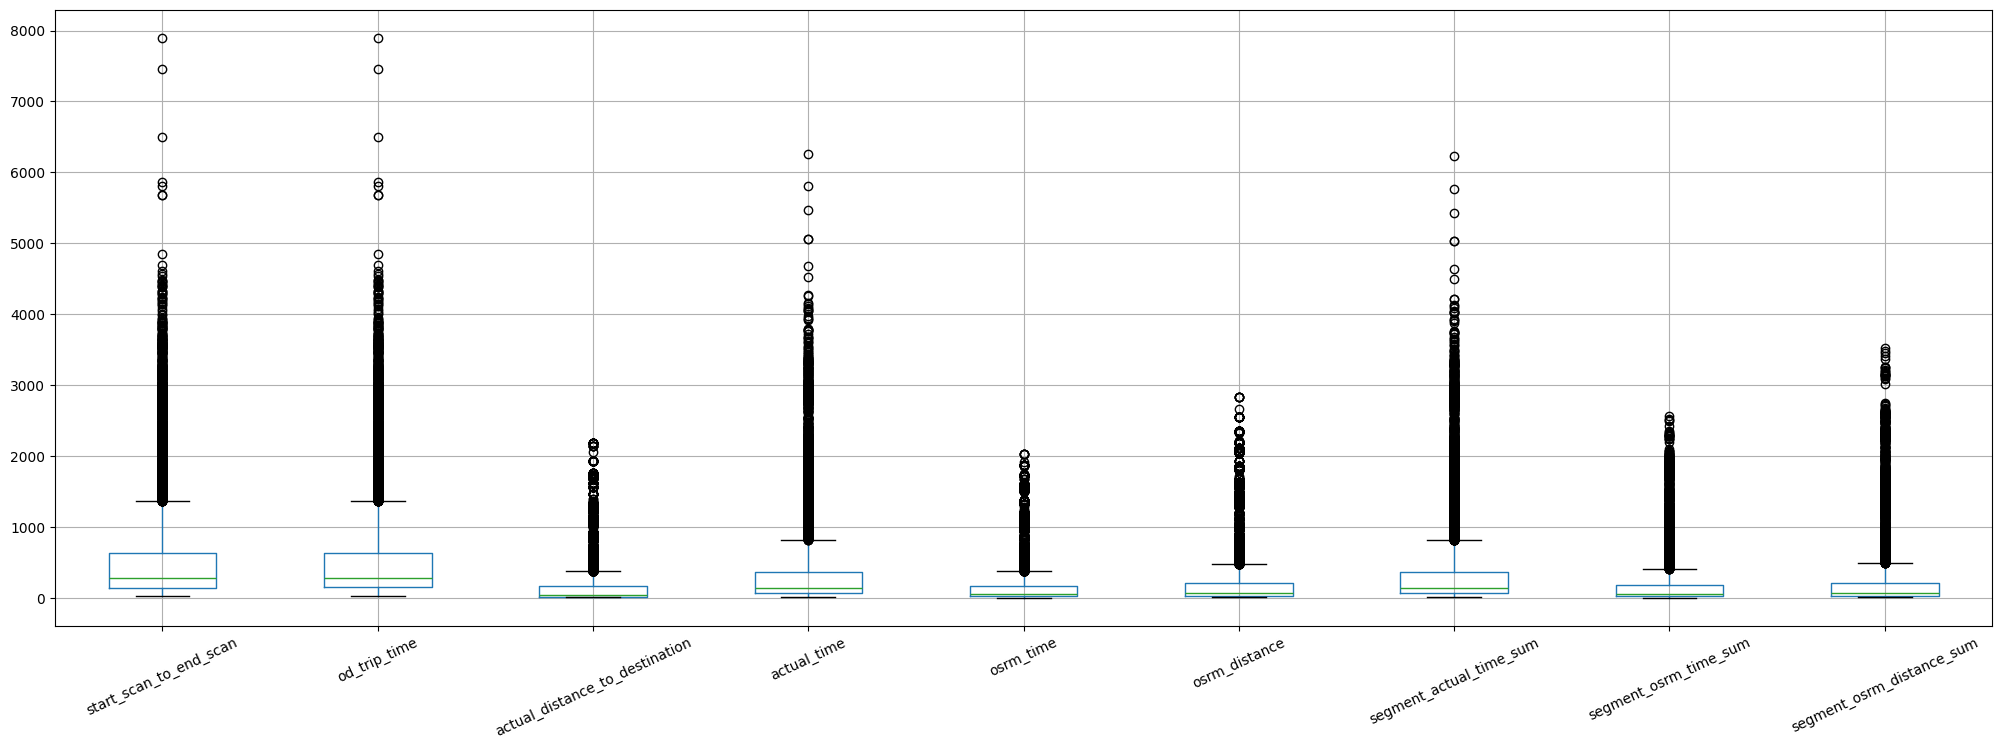

In [95]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

In [96]:
# percentiles= [.5, .25, .33, .67, .75, .95]
percentiles= [25, .75]
d = trip[num_cols].describe().drop('count').T
d['IQR'] = d['75%'] - d['25%']
# d['L.B.'] = d['50%'] - 1.5*d['IQR']
d['H.B.'] = d['50%'] + 1.5*d['IQR']
d

,mean,std,min,25%,50%,75%,max,IQR,H.B.
start_scan_to_end_scan,530.810016,658.705957,23.000000,149.000000,280.000000,637.000000,7898.000000,488.000000,1012.000000
od_trip_time,531.699602,658.872369,23.000000,150.000000,281.000000,638.000000,7899.000000,488.000000,1013.000000
actual_distance_to_destination,164.477838,305.388147,9.002461,22.837239,48.474072,164.583208,2186.531787,141.745969,261.093025
actual_time,357.143754,561.396157,9.000000,67.000000,149.000000,370.000000,6265.000000,303.000000,603.500000
osrm_time,161.384018,271.360995,6.000000,29.000000,60.000000,168.000000,2032.000000,139.000000,268.500000
osrm_distance,204.344689,370.395573,9.072900,30.819200,65.618800,208.475000,2840.081000,177.655800,332.102500
segment_actual_time_sum,353.892286,556.247965,9.000000,66.000000,147.000000,367.000000,6230.000000,301.000000,598.500000
segment_osrm_time_sum,180.949787,314.542047,6.000000,31.000000,65.000000,185.000000,2564.000000,154.000000,296.000000
segment_osrm_distance_sum,223.201161,416.628374,9.072900,32.654500,70.154400,218.802400,3523.632400,186.147900,349.376250


In [97]:
d['H.B.']

start_scan_to_end_scan            1012.000000
od_trip_time                      1013.000000
actual_distance_to_destination     261.093025
actual_time                        603.500000
osrm_time                          268.500000
osrm_distance                      332.102500
segment_actual_time_sum            598.500000
segment_osrm_time_sum              296.000000
segment_osrm_distance_sum          349.376250
Name: H.B., dtype: float64

In [98]:
filtered_trip = trip[(trip[num_cols]<=d['H.B.']).all(axis=1)]
filtered_trip.head()

,trip_month,trip_day,trip_week,trip_dayofweek,trip_isHoliday,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,od_start_time,od_end_time,start_scan_to_end_scan,od_trip_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
1,9,12,37,2,False,Doddablpur,ChikaDPP,D,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,180,182,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
3,9,12,37,2,False,Mumbai Hub,Unknown,Unknown,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100,100,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,9,12,37,2,False,Bellary,Dc,Unknown,Karnataka,Sandur,WrdN1DPP,D,Karnataka,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,717,719,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
5,9,12,37,2,False,Chennai,Poonamallee,Unknown,Tamil Nadu,Chennai,Poonamallee,Unknown,Tamil Nadu,2018-09-12 02:12:10.755603,2018-09-12 02:12:10.755603,189,191,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647
6,9,12,37,2,False,Chennai,Chrompet,DPC,Tamil Nadu,Chennai,Vandalur,Dc,Tamil Nadu,2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,98,98,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184


In [99]:
filtered_trip.shape

(11853, 24)

<Axes: >

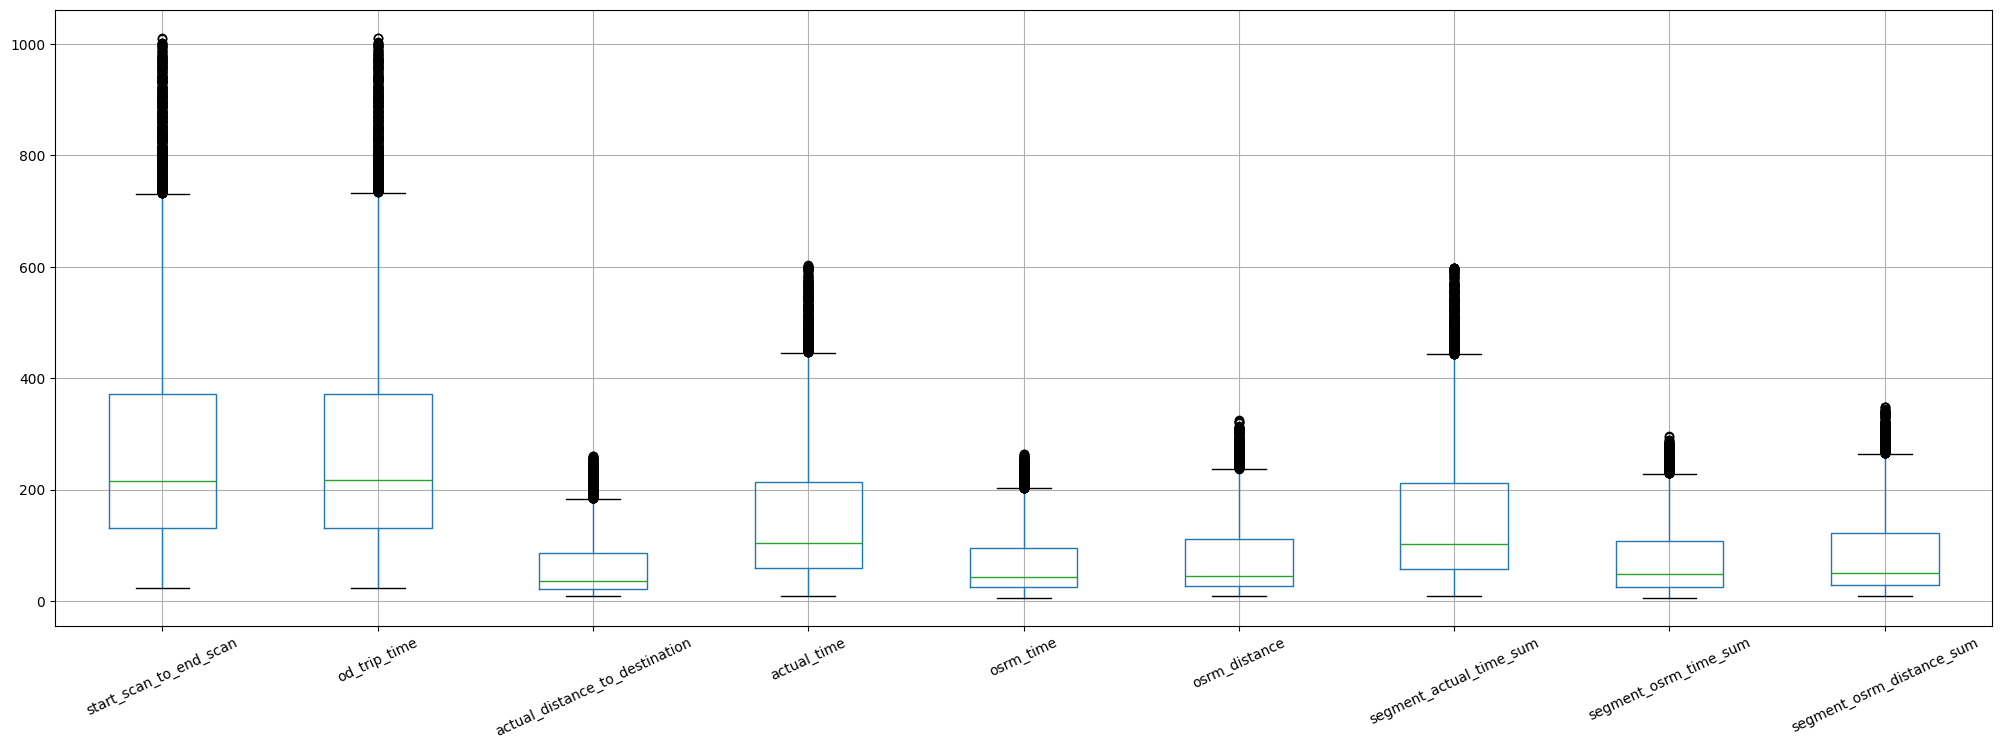

In [100]:
filtered_trip[num_cols].boxplot(rot=25, figsize=(25,8))

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
filtered_trip.loc[:,num_cols] = scaler.fit_transform(filtered_trip[num_cols])
filtered_trip[num_cols]

C:\Users\USER\AppData\Local\Temp\ipykernel_34204\1703240805.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.15890688 0.07793522 0.70242915 ... 0.40283401 0.32793522 0.3340081 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  filtered_trip.loc[:,num_cols] = scaler.fit_transform(filtered_trip[num_cols])
C:\Users\USER\AppData\Local\Temp\ipykernel_34204\1703240805.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.16093117 0.07793522 0.70445344 ... 0.40384615 0.32894737 0.33502024]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  filtered_trip.loc[:,num_cols] = scaler.fit_transform(filtered_trip[num_cols])


,start_scan_to_end_scan,od_trip_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
1,0.158907,0.160931,0.256059,0.225589,0.240310,0.240377,0.224109,0.203448,0.221207
3,0.077935,0.077935,0.032605,0.084175,0.034884,0.033532,0.084890,0.034483,0.031815
4,0.702429,0.704453,0.472531,0.558923,0.430233,0.435366,0.561969,0.375862,0.405562
5,0.168016,0.170040,0.062213,0.087542,0.065891,0.060038,0.086587,0.058621,0.055928
6,0.075911,0.075911,0.000391,0.025253,0.027132,0.009312,0.025467,0.024138,0.008674
...,...,...,...,...,...,...,...,...,...
14812,0.236842,0.237854,0.194523,0.124579,0.217054,0.203554,0.123939,0.193103,0.164270
14813,0.037449,0.038462,0.025976,0.020202,0.023256,0.022177,0.020374,0.017241,0.020659
14814,0.402834,0.403846,0.118415,0.459596,0.162791,0.157529,0.461800,0.282759,0.282157
14815,0.327935,0.328947,0.501555,0.429293,0.670543,0.512244,0.422750,0.741379,0.631551


In [102]:
filtered_trip[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,11853.0,0.258409,0.202703,0.0,0.109312,0.195344,0.352227,1.0
od_trip_time,11853.0,0.259210,0.202986,0.0,0.109312,0.196356,0.353239,1.0
actual_distance_to_destination,11853.0,0.209971,0.232170,0.0,0.047305,0.105162,0.307583,1.0
actual_time,11853.0,0.239860,0.207226,0.0,0.084175,0.159933,0.345118,1.0
osrm_time,11853.0,0.236918,0.221437,0.0,0.073643,0.147287,0.348837,1.0
osrm_distance,11853.0,0.217837,0.226064,0.0,0.058061,0.111799,0.324009,1.0
segment_actual_time_sum,11853.0,0.239360,0.207407,0.0,0.083192,0.159593,0.344652,1.0
segment_osrm_time_sum,11853.0,0.233177,0.218460,0.0,0.068966,0.148276,0.348276,1.0
segment_osrm_distance_sum,11853.0,0.218919,0.223094,0.0,0.057221,0.122829,0.335398,1.0


## Observation:

1. `cutoff_factor` and `actual_distance_to_destination` are highly correlated.
1. `start_scan_to_end_scan` and `od_trip_time` are highly correlated.
1. Top 3 exorters: `Maharashtra` (2748), `Karnataka` (2325), `Haryana` (1839)
1. Top 3 importers: `Maharashtra` (2637), `Karnataka` (2426), `Haryana` (1805)
1. Top 3 intra exporters-importers: `Maharashtra` (2487), `Karnataka` (2130), `Tamil Nadu` (1048)
1. Top 3 inter exporters: `Haryana` (1043), `Delhi` (604),`Maharashtra` (310)
1. Top 3 inter importers: `Haryana` (1009), `Delhi` (486), `Karnataka` (339)
1. Top 3 States which exports more than imports: `Delhi`, `Maharashtra`, `Chandigarh`
1. Top 3 States which imports more than exports: `Punjab`, `Telengana`, `Karnataka`
1. 3 State which imports as much exports: `Goa`, `Meghalaya` and `Gujrat`.
1. Every trip happened in 2018.
1. `Time interverval between two consecutive trip creation` almost follows Poisson Distribution/ Exponential distribution (histogram plot) but when we tried for hypothesis testing, it failed. Also we found strong evidence of autocorrelation at different lags.
1. We found for certain columns, `segment_osrm_time` is zero, for those case, `segment_factor` is given -1, if we want to use these feature, we need to remove those particular rows.
1. We can see that our estimated formula for `factor` and `segment_factor` aligns perfectly with the data, as the correlation coefficient is 1.
1. We found for `segment_factor` that non-holiday values are significantly higher than holiday values.
1. September month has more number of trips than October.
1. 38th week (September month) has more number of trips than October.


## Future Scope:

1. Top export, import analysis can be done for each city wise, like state we did here.
1. Search engine should be optimized for better prediction.